# Práctica 3b. Procesamiento de imágenes

### 1. El negativo de una imagen es el resultado de aplicar lasiguiente operación: 255-imagen(i,j). Aplica esta operación sobre la imagen2.png y, posteriormente, crea un video que vaya mezclando las dos imágenes por columnas, de forma que aparezca primero el negativo de la imagen y vaya apareciendo poco a poco la imagen original. El número de iteraciones debe ser igual al ancho de la imagen y en cada una se debe ir desplazando una columna a la derecha la imagen original sobre el negativo. Guarda el vídeo con el nombre vídeo2.mp4. (1.0 puntos)

In [1]:
import cv2 as cv
import numpy as np

img = cv.imread("recursos/imagen2.png")
alto, ancho, canales = img.shape

img_invertida = 255-img

nombre_video = 'video2.mp4'
fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter(nombre_video, fourcc, 30, (ancho, alto))

frame = img_invertida
frame_original = img

for i in range(0, ancho):
    frame[:, :i] = frame_original[:, :i]
    video.write(frame)

video.release()

print(f"Vídeo guardado como {nombre_video}")

Vídeo guardado como video2.mp4


### 2. Desarrolla una pequeña aplicación que mediante trackbars permita hacer transformaciones en el rango dinámico(logarítmica y exponencial) seleccionando la intensidad de la compresión/expansión. Selecciona dos imágenes donde el efecto de ambas transformaciones se perciba claramente. (1.0 puntos)

In [6]:
import cv2
import numpy as np

# Rutas de imágenes
imagen_clara = "images/ej3_clara.png"
imagen_oscura = "images/ej3_oscura.jpg"

# Variable global para la imagen actual
img = None
L = 256  # niveles de intensidad

# -------------------------------------------------------
# FUNCIONES DE TRANSFORMACIÓN
# -------------------------------------------------------

def log_transform(img, sigma):
    r = img.astype(np.float32) / 255.0
    rmax = r.max()
    c = (L - 1) / np.log(1 + sigma * rmax)
    s = c * np.log(1 + sigma * r)
    return np.clip(s, 0, 255).astype(np.uint8)

def exp_transform(img, alfa):
    r = img.astype(np.float32) / 255.0
    rmax = r.max()
    denominator = np.exp(alfa * rmax) - 1
    if denominator == 0:
        denominator = 1e-10
    c = (L - 1) / denominator
    s = c * (np.exp(alfa * r) - 1)
    return np.clip(s, 0, 255).astype(np.uint8)


# -------------------------------------------------------
# ACTUALIZACIÓN DE LA IMAGEN Y LA TRANSFORMACIÓN
# -------------------------------------------------------

def update(_=None):
    global img

    # Selección de imagen -------------------------------
    modo_img = cv2.getTrackbarPos("Imagen (0=Clara/1=Osc)", "Transformaciones")
    if modo_img == 0:
        img = cv2.imread(imagen_clara, cv2.IMREAD_GRAYSCALE)
    else:
        img = cv2.imread(imagen_oscura, cv2.IMREAD_GRAYSCALE)

    # Selección de modo de transformación ----------------
    modo = cv2.getTrackbarPos("Modo (0=Log / 1=Exp)", "Transformaciones")
    param_value = cv2.getTrackbarPos("Intensidad", "Transformaciones")

    if modo == 0:  # LOGARÍTMICA
        sigma = max(param_value / 5.0, 0.1)
        out = log_transform(img, sigma)
        txt1 = f"LOGARITMICA - sigma = {sigma:.2f}"
        txt2 = "s = c * log(1 + sigma * r)"
        txt3 = f"c = (L-1) / log(1 + sigma * rmax)"
        txt4 = "Compresion: expande oscuros, comprime brillos"

    else:  # EXPONENCIAL
        alfa = max(param_value / 10.0, 0.1)
        out = exp_transform(img, alfa)
        txt1 = f"EXPONENCIAL - alfa = {alfa:.2f}"
        txt2 = "s = c * (exp(alfa * r) - 1)"
        txt3 = f"c = (L-1) / (exp(alfa * rmax) - 1)"
        txt4 = "Expansion: comprime oscuros, expande brillos"

    # Mostrar resultado -----------------------------------
    display = cv2.cvtColor(out, cv2.COLOR_GRAY2BGR)
    cv2.putText(display, txt1, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(display, txt2, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 1)
    cv2.putText(display, txt3, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (200, 200, 200), 1)
    cv2.putText(display, txt4, (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 0), 1)

    cv2.imshow("Transformaciones", display)


# -------------------------------------------------------
# CREAR INTERFAZ
# -------------------------------------------------------

cv2.namedWindow("Transformaciones")

# ← NUEVO TRACKBAR (selección de imagen)
cv2.createTrackbar("Imagen (0=Clara/1=Osc)", "Transformaciones", 0, 1, update)

cv2.createTrackbar("Modo (0=Log / 1=Exp)", "Transformaciones", 0, 1, update)
cv2.createTrackbar("Intensidad", "Transformaciones", 25, 100, update)

update()  # Mostrar primer frame

# LOOP PRINCIPAL
while True:
    if cv.waitKey(1) & 0xFF == 27:  # ESC → salir
        break

cv2.destroyAllWindows()
cv2.waitKey(1) 


-1

### 3. Mezcla las imágenes imagen7_1.jpg e imagen7_2.png de forma no lineal utilizando la siguiente expresión:

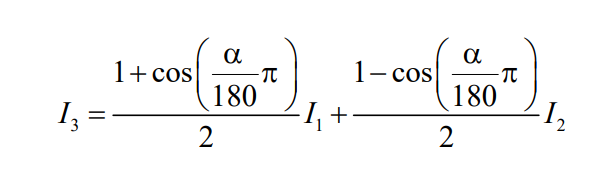

Crea un vídeo de 360 frames aumentando el ángulo en 1°
en cada iteración y guárdalo con el nombre de video7.mp4. (1.0 punto)

In [7]:
import numpy as np
import cv2 as cv

img1 = cv.imread('recursos/imagen7_1.jpg')
img2 = cv.imread('recursos/imagen7_2.png')

if img1.shape[1] != img2.shape[1] and img1.shape[0] != img2.shape[0]:
    print('Las imagenes son de diferente tamaño')
else:
    print('Las imagenes tienen el mismo tamaño')
    
frames = 360
nombre_video = 'video7.mp4'

w, h = img1.shape[:2]
fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter(nombre_video, fourcc, 30, (h, w))

img1_float = img1.astype(np.float32)
img2_float = img2.astype(np.float32)

for alpha in range(frames):
    img3 = ((1 + np.cos((alpha/180)*np.pi))/2) * img1_float + ((1 - np.cos((alpha/180)*np.pi))/2) * img2_float
    img3 = np.clip(img3, 0, 255).astype(np.uint8)
    
    video.write(img3)


video.release()

print(f"Vídeo guardado como {nombre_video}")



Las imagenes tienen el mismo tamaño
Vídeo guardado como video7.mp4


### 4. Obtén el ecualizado del histograma de la imagen imagen3.png. (0.5 puntos).

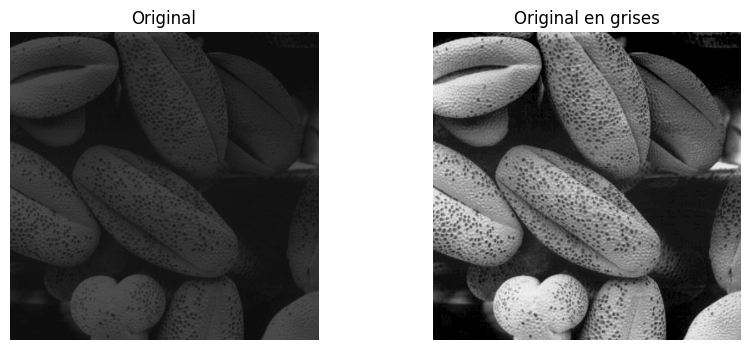

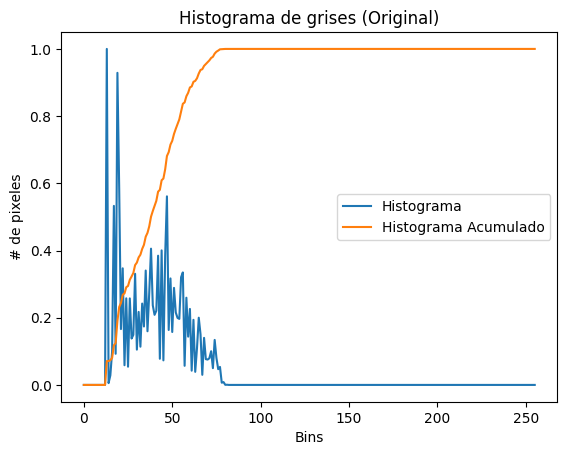

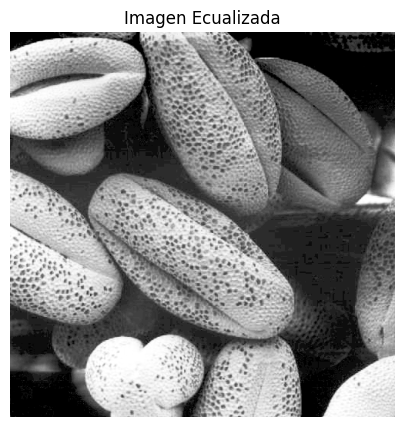

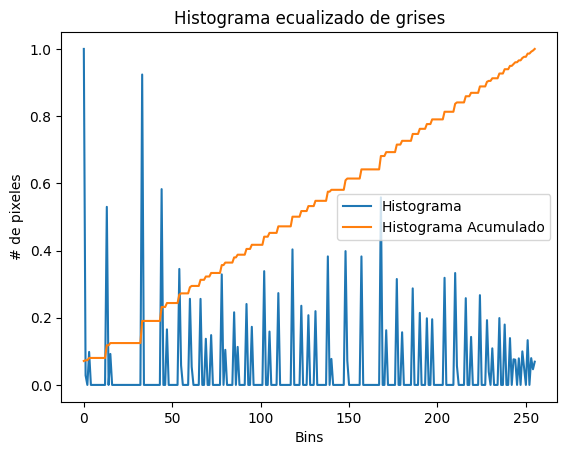

True

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Cargar la imagen y convertir a grises
# -----------------------------------------------------------
image = cv.imread('recursos/imagen3.png')
gris = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Mostrar imagen original y en grises con Matplotlib
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gris, cmap="gray")
plt.title("Original en grises")
plt.axis("off")

plt.show()


# -----------------------------------------------------------
# Histograma y acumulado original
# -----------------------------------------------------------
gris_hist = cv.calcHist([gris], [0], None, [256], [0,256])
gris_cum = np.cumsum(gris_hist)

plt.figure()
plt.title('Histograma de grises (Original)')
plt.xlabel('Bins')
plt.ylabel('# de pixeles')

plt.plot(gris_hist / np.max(gris_hist))
plt.plot(gris_cum / np.max(gris_cum))
plt.legend(['Histograma', 'Histograma Acumulado'], loc='right')

plt.savefig("gray_histogram.svg")
plt.show()


# -----------------------------------------------------------
# APLICAR ECUALIZACIÓN
# -----------------------------------------------------------
equalized = cv.equalizeHist(gris)

# Mostrar imagen ecualizada
plt.figure(figsize=(6,5))
plt.imshow(equalized, cmap="gray")
plt.title("Imagen Ecualizada")
plt.axis("off")
plt.show()


# -----------------------------------------------------------
# Histograma y acumulado tras ecualizar
# -----------------------------------------------------------
gris_hist = cv.calcHist([equalized], [0], None, [256], [0,256])
gris_cum = np.cumsum(gris_hist)

plt.figure()
plt.title('Histograma ecualizado de grises')
plt.xlabel('Bins')
plt.ylabel('# de pixeles')

plt.plot(gris_hist / np.max(gris_hist))
plt.plot(gris_cum / np.max(gris_cum))
plt.legend(['Histograma', 'Histograma Acumulado'], loc='right')

plt.savefig("gray_histogram_equalized.svg")
plt.show()


# -----------------------------------------------------------
# Guardar resultado final
# -----------------------------------------------------------
cv.imwrite('ImagenEqualizada.png', equalized)


### 5. Elimina el ruido de la imagen resultado del paso 4 utilizando un filtro bilateral con un diámetro d=10 y valores de sigmade 11 y 11. Guarda el resultado comoimagen3_salida.png. (0.5 puntos)

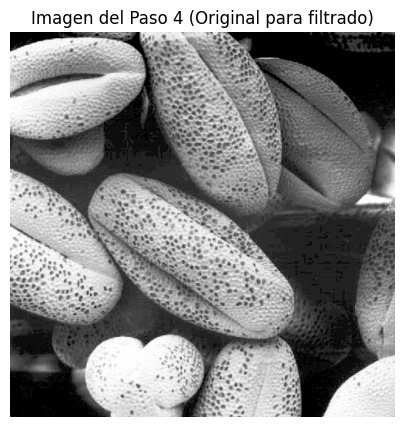

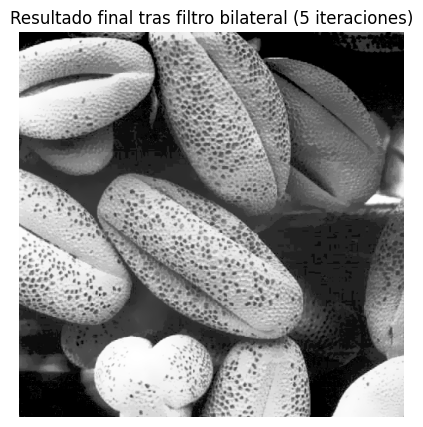

True

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen ecualizada (resultado del ejercicio 4)
img = cv.imread('ImagenEqualizada.png')

# -------- Mostrar imagen original del paso 4 --------
plt.figure(figsize=(6,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Imagen del Paso 4 (Original para filtrado)")
plt.axis("off")
plt.show()

# -------- Aplicar filtro bilateral 5 veces --------
img_filtrada = img.copy()

for i in range(5):
    img_filtrada = cv.bilateralFilter(img_filtrada, 10, 11, 11)

# -------- Mostrar imagen final filtrada --------
plt.figure(figsize=(6,5))
plt.imshow(cv.cvtColor(img_filtrada, cv.COLOR_BGR2RGB))
plt.title("Resultado final tras filtro bilateral (5 iteraciones)")
plt.axis("off")
plt.show()

# Guardar resultado final
cv.imwrite('Imagen3_salida.png', img_filtrada)


### 6. Calcula la norma del gradiente de la imagen5.jpg utilizando los operadores de Sobel. Umbraliza los valores de la norma de forma que los valores mayores o iguales a 128 se igualen a 255 y los menores de 128 se igualen a 0. Finalmente, aplica un filtro Gaussiano de radio (7,7) con sigma=-1. Guarda el resultado con el nombre imagen5_salida.png. (1.5 puntos)

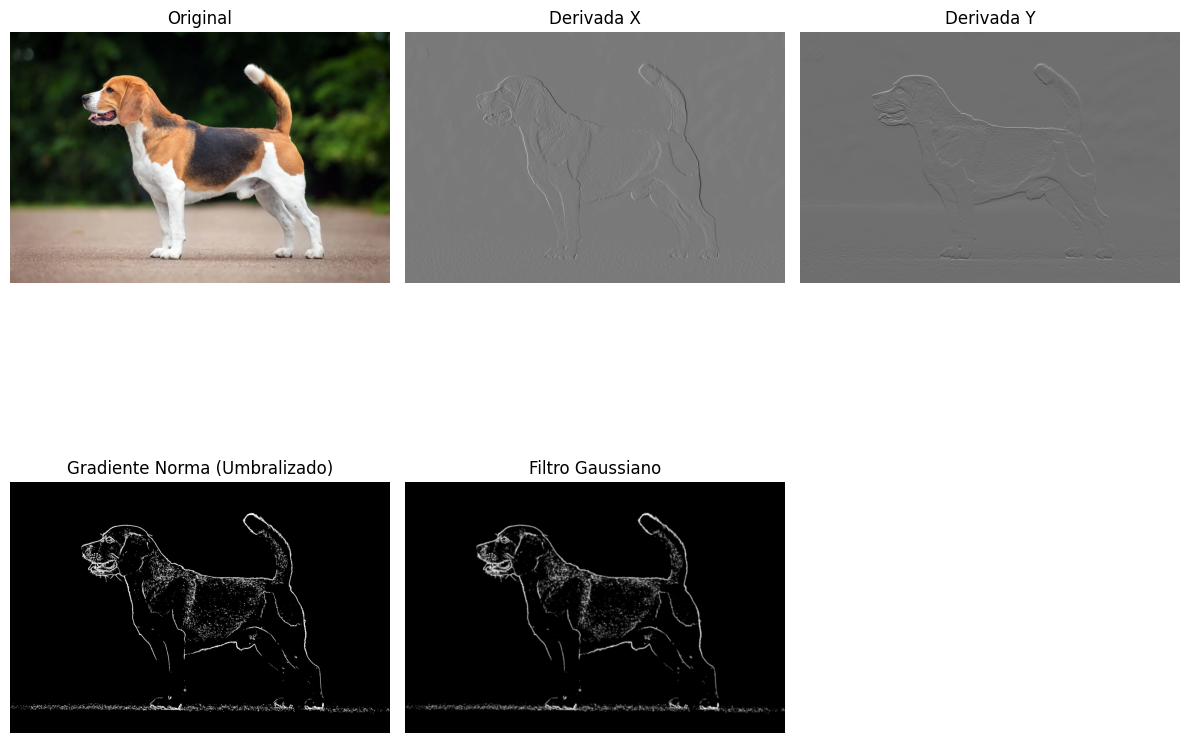

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def normalizar(image):
    maximo = np.max(image)
    minimo = np.min(image)
    dif = maximo - minimo
    image_norm = 255 * (image.astype(np.float32) - minimo) / dif
    return image_norm

# Leer imagen
image = cv.imread('recursos/imagen5.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Derivadas Sobel
dx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
dy = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

# Norma del gradiente
gradiante_norma = np.sqrt(dx**2 + dy**2)

# Umbral
gradiante_norma[gradiante_norma >= 128] = 255
gradiante_norma[gradiante_norma < 128] = 0
gradiante_norma = gradiante_norma.astype(np.uint8)

# Filtro Gaussiano
gauss = cv.GaussianBlur(gradiante_norma, (7, 7), sigmaX=-1)

# Guardar salida
cv.imwrite('imagen5_salida.png', gauss)

# -------------------------------------------------
# Mostrar todo en el notebook con matplotlib
# -------------------------------------------------

plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(normalizar(dx).astype(np.uint8), cmap='gray')
plt.title("Derivada X")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(normalizar(dy).astype(np.uint8), cmap='gray')
plt.title("Derivada Y")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gradiante_norma, cmap='gray')
plt.title("Gradiente Norma (Umbralizado)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gauss, cmap='gray')
plt.title("Filtro Gaussiano")
plt.axis('off')

plt.tight_layout()
plt.show()


### 7. Con la imagen4.jpg, crea un vídeo de 100 frames aplicando un filtro mediano de radio (ksize) igual a 7. Aplica el filtro en cada iteración al resultado de la iteración anterior. Guarda el vídeo con el nombre video4.mp4.(0.5 puntos)

In [11]:
import cv2 as cv
import numpy as np

img = cv.imread('recursos/imagen4.jpg')
alto, ancho, canales = img.shape

frames = 100
fps = 10.0
nombre_video = 'video4.mp4'

fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter(nombre_video, fourcc, fps, (ancho, alto))

frame = img

for i in range(frames):
    video.write(frame)
    frame = cv.medianBlur(frame, 7)

video.release()

print(f"Vídeo guardado como {nombre_video}")

Vídeo guardado como video4.mp4


### 8. Elimina el ruido de la imagen6.png aplicando todos los algoritmos vistos en clase para este fin. Si es necesario aplica los filtros múltiples veces para eliminar el ruido lomejor posible. Haz un breve estudio comparativo entre las técnicas y selecciona el mejor resultado. (1 punto)

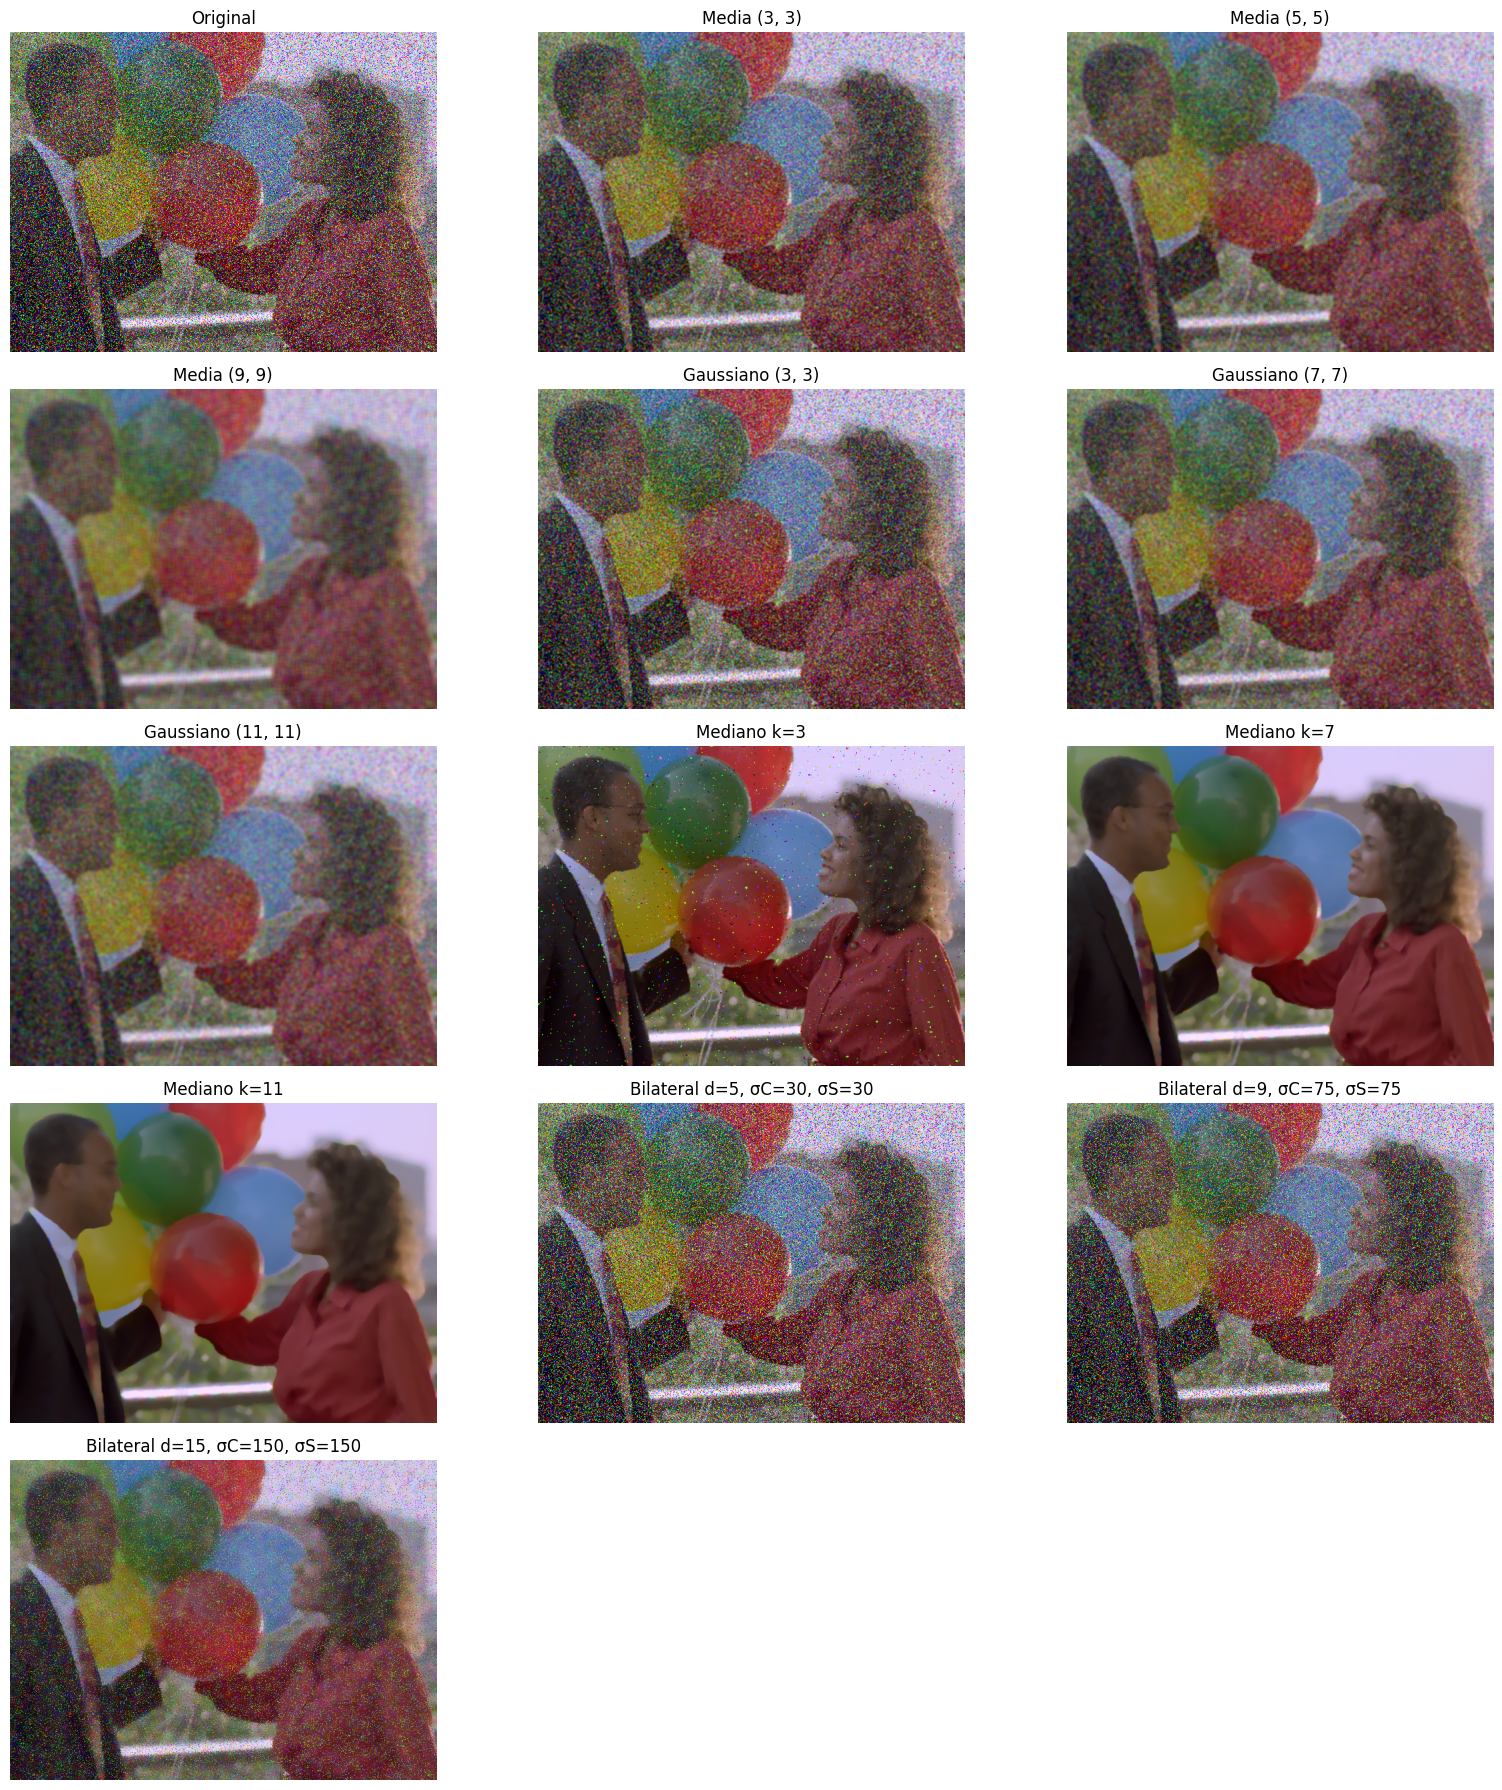

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Cargar imagen
img = cv2.imread("recursos/imagen6.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# 1. Filtro de MEDIA (3 parámetros)
media_params = [(3,3), (5,5), (9,9)]
media_results = [cv2.blur(img_rgb, k) for k in media_params]


# 2. Filtro GAUSSIANO (3 parámetros)
gauss_params = [(3,3), (7,7), (11,11)]
gauss_results = [cv2.GaussianBlur(img_rgb, k, 0) for k in gauss_params]


# 3. Filtro MEDIANO (3 parámetros)
median_params = [3, 7, 11]
median_results = [cv2.medianBlur(img_rgb, k) for k in median_params]


# 4. Filtro BILATERAL (3 parámetros)
bilateral_params = [
    (5, 30, 30),   # d, sigmaColor, sigmaSpace
    (9, 75, 75),
    (15, 150, 150)
]
bilateral_results = [
    cv2.bilateralFilter(img_rgb, d, sigmaColor, sigmaSpace)
    for (d, sigmaColor, sigmaSpace) in bilateral_params
]

# MOSTRAR RESULTADOS
plt.figure(figsize=(16, 18))

# ---- Original
plt.subplot(5, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

# ---- Media
for i, (param, result) in enumerate(zip(media_params, media_results)):
    plt.subplot(5, 3, i+2)
    plt.imshow(result)
    plt.title(f"Media {param}")
    plt.axis("off")

# ---- Gaussiano
for i, (param, result) in enumerate(zip(gauss_params, gauss_results)):
    plt.subplot(5, 3, i+5)
    plt.imshow(result)
    plt.title(f"Gaussiano {param}")
    plt.axis("off")

# ---- Mediano
for i, (param, result) in enumerate(zip(median_params, median_results)):
    plt.subplot(5, 3, i+8)
    plt.imshow(result)
    plt.title(f"Mediano k={param}")
    plt.axis("off")

# ---- Bilateral
for i, (param, result) in enumerate(zip(bilateral_params, bilateral_results)):
    (d, sc, ss) = param
    plt.subplot(5, 3, i+11)
    plt.imshow(result)
    plt.title(f"Bilateral d={d}, σC={sc}, σS={ss}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Tras aplicar los filtros de media, gaussiano, bilateral y mediana sobre la imagen con ruido extremo, se observa que los tres primeros no son eficaces para eliminar el ruido sal-y-pimienta: la media y el gaussiano apenas reducen el ruido y además provocan un desenfoque apreciable, mientras que el filtro bilateral suaviza la imagen pero no consigue suprimir el ruido impulsivo. En cambio, el filtro de la mediana elimina de forma muy efectiva todo el ruido (a partir de k=7) manteniendo los bordes y la estructura de la escena. Por tanto, el filtro mediano es la técnica claramente superior en este caso y se selecciona como el método final para la reducción de ruido.

### 9. Investiga sobre alguna técnica de filtrado distinta a las vistasen clase. Explícala y codifica un ejemplo de uso. A continuación, propón dos filtros de tu invención (lineales o no lineales) especializados en detectar bordes o eliminar ruido. (1 punto)

Una técnica de filtrado distinta a las vistas en clase es el método Non-Local Means (NLM). A diferencia de los filtros tradicionales (media, gaussiano o mediana), que utilizan únicamente la información contenida en un vecindario cercano, el filtrado NLM utiliza regiones similares encontradas en toda la imagen, aunque estén lejos del píxel que se desea suavizar.

La idea principal es que muchas imágenes presentan patrones repetidos (texturas de piel, zonas uniformes, fondos, etc.). El filtro NLM compara parches de la imagen y calcula un promedio ponderado donde los parches más similares tienen mayor peso. Esto permite reducir el ruido preservando detalles, incluso mejor que otros métodos lineales o no lineales.

Ventajas principales del método NLM:

- Preserva texturas y bordes mucho mejor que el gaussiano o el promedio.
- Muy eficaz para ruido de luminancia y crominancia.
- No introduce el efecto de borrosidad característico de otros filtros.

Inconvenientes:
- Es más lento porque compara parches en ventanas grandes.
- Requiere ajustar varios parámetros.

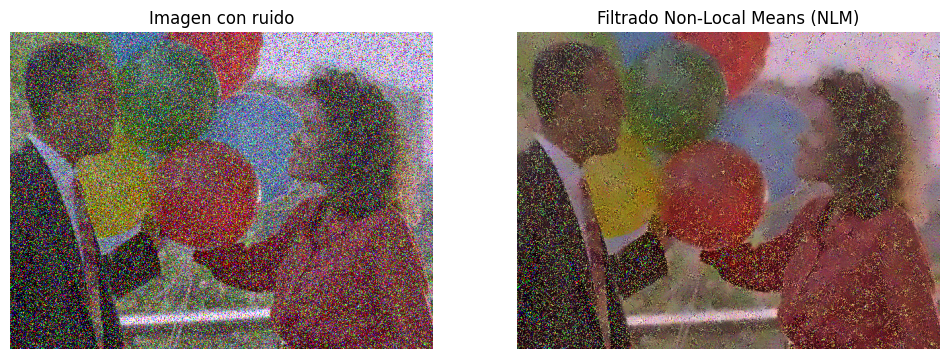

In [10]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen con ruido
img = cv2.imread("recursos/imagen6.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Aplicación del filtrado Non-Local Means (versión para color)
nlm_strong = cv2.fastNlMeansDenoisingColored(
    img,
    None,
    h=25,            # fuerza luminancia (más fuerte)
    hColor=25,       # fuerza crominancia
    templateWindowSize=7,
    searchWindowSize=21
)

nlm_rgb = cv2.cvtColor(nlm_strong, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Imagen con ruido")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(nlm_rgb)
plt.title("Filtrado Non-Local Means (NLM)")
plt.axis("off")

plt.show()



#### Filtro no lineal inventado

El primer filtro propuesto es un filtro no lineal de tipo “mediana adaptativa”, diseñado específicamente para eliminar ruido impulsivo (por ejemplo, ruido sal-y-pimienta) sin degradar en exceso los detalles de la imagen.

A diferencia del filtro de mediana tradicional —que sustituye siempre el píxel central por la mediana de su vecindario— este método introduce un criterio de decisión adaptativo. Para cada píxel, el algoritmo:

1. Extrae una ventana local de tamaño 𝑘×𝑘
2. Calcula la mediana de esa ventana.
3. Compara el valor del píxel central con dicha mediana.
4. Si la diferencia es mayor que un umbral, el píxel se considera ruido y se reemplaza por la mediana.
5. Si la diferencia es pequeña, el píxel se mantiene sin modificar.

Este comportamiento permite que el filtro:

- Elimine eficazmente valores aislados extremadamente brillantes u oscuros (típicos del ruido impulsivo).
- Conserve detalles y zonas de textura donde el píxel ya es coherente con su vecindario.
- Evite el exceso de suavizado y la pérdida de nitidez que produce la mediana estándar cuando se usa un kernel grande.

En resumen, este filtro combina la robustez de la mediana con una lógica adaptativa, logrando una reducción de ruido más selectiva y con menor distorsión en zonas homogéneas.

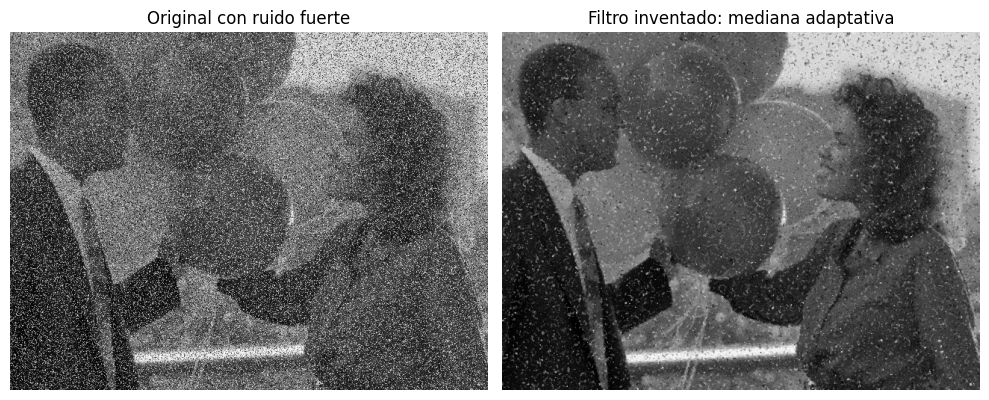

: 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def filtro_mediana_adaptativo(img, ksize=3, umbral=30):
    """
    Filtro no lineal inventado:
    - Si el píxel central difiere mucho de la mediana local, se reemplaza por la mediana.
    - Si no, se mantiene.
    
    img: imagen en escala de grises
    ksize: tamaño de ventana (impar)
    umbral: diferencia máxima permitida respecto a la mediana
    """
    assert ksize % 2 == 1, "ksize debe ser impar"

    img = img.astype(np.float32)
    r = ksize // 2
    padded = np.pad(img, r, mode='reflect')
    out = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            med = np.median(region)
            center = img[i, j]

            if abs(center - med) > umbral:
                out[i, j] = med   # se considera ruido
            else:
                out[i, j] = center  # se mantiene el detalle

    return np.clip(out, 0, 255).astype(np.uint8)

# Probar con imagen6 en gris
img = cv2.imread("recursos/imagen6.png", cv2.IMREAD_GRAYSCALE)
adapt_med = filtro_mediana_adaptativo(img, ksize=3, umbral=25)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original con ruido fuerte")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(adapt_med, cmap="gray")
plt.title("Filtro inventado: mediana adaptativa")
plt.axis("off")

plt.tight_layout()
plt.show()


#### Detector de bordes inventado

El segundo filtro propuesto es un detector de bordes simple basado en la diferencia entre cada píxel y la media de sus vecinos. Para cada posición, se calcula un vecindario 3×3 y se obtiene la media de los ocho píxeles alrededor del centro.

Si el valor del píxel central difiere significativamente de esta media, se interpreta como un cambio brusco de intensidad y, por tanto, como un borde.

Este filtro es lineal y muy fácil de implementar. A diferencia de Sobel o Prewitt, no calcula gradientes, sino que se basa únicamente en comparaciones locales, lo que lo convierte en un detector de bordes sencillo pero efectivo.

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def filtro_bordes_vecinal(img, umbral=25):
    """
    Filtro de bordes inventado:
    - Compara el píxel central con la media del vecindario.
    - Si la diferencia es grande → borde.
    """
    img = img.astype(np.float32)
    h, w = img.shape
    out = np.zeros_like(img)

    padded = np.pad(img, 1, mode='reflect')

    for i in range(h):
        for j in range(w):
            region = padded[i:i+3, j:j+3]
            vecinos = region.flatten()
            vecinos = np.delete(vecinos, 4)   # quitamos el píxel central
            media = np.mean(vecinos)
            centro = img[i, j]

            if abs(centro - media) > umbral:
                out[i, j] = 255    # borde
            else:
                out[i, j] = 0      # no borde

    return out.astype(np.uint8)

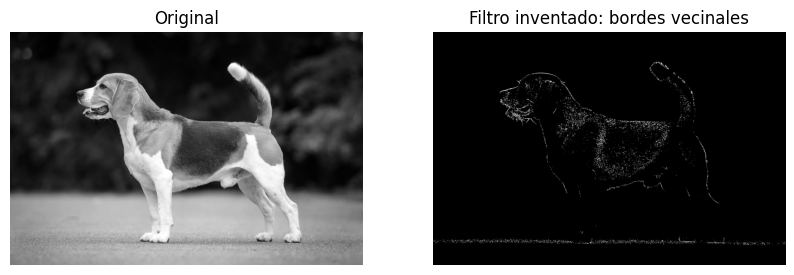

In [15]:
img = cv2.imread("recursos/imagen5.png", cv2.IMREAD_GRAYSCALE)
bordes = filtro_bordes_vecinal(img, umbral=20)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bordes, cmap='gray')
plt.title("Filtro inventado: bordes vecinales")
plt.axis("off")

plt.show()